<a href="https://colab.research.google.com/github/leeyerin25/TIL_python/blob/main/suicide_deep_learning_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
from collections import Counter
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
np.random.seed(3)
tf.random.set_seed(3)

df = pd.read_csv("/content/drive/MyDrive/기계학습/suicide_data.csv")
df

,ID,apt_t,sex,cfam,allownc,house,live_t,marri_2,tins,npins,...,N_CHOL,N_CHO,N_TDF,N_CA,N_FE,N_NA,N_K,N_VITC,LF_SAFE,LF_S2
0,A739211515,1,2,3,20,2,3,1,10,1,...,220.911,213.937,12.957,469.710,9.405,2117.652,2540.971,31.666,2,3
1,A739211516,1,1,3,20,2,3,1,10,1,...,352.617,274.917,20.682,372.172,14.404,3699.691,2589.378,43.118,2,3
2,A739211517,1,2,3,20,2,3,3,20,1,...,136.681,272.175,19.292,266.870,13.276,2265.539,2073.714,105.935,2,3
3,A739219614,1,1,4,20,1,3,1,20,1,...,41.882,243.170,25.090,358.145,20.760,4282.505,1830.424,41.371,2,3
4,A739219615,1,2,4,20,1,3,1,20,1,...,140.545,288.721,30.959,487.907,14.351,2875.440,6069.345,88.895,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375,P702300217,2,1,4,10,1,2,88,30,2,...,691.964,702.860,30.675,729.327,21.411,6821.265,5393.122,85.347,3,1
7376,P702312314,2,2,2,20,1,2,3,10,2,...,227.482,297.520,42.728,503.535,19.751,3801.607,5115.446,332.436,1,3
7377,P702322414,2,1,1,20,1,2,3,10,2,...,56.957,490.710,28.559,446.249,14.001,7703.677,2881.317,62.240,2,3
7378,P702330414,2,1,1,10,1,2,2,30,2,...,2.523,335.034,14.751,183.639,11.132,1480.816,1686.216,18.751,2,1


In [9]:
print(df.shape)

(7380, 89)


## Feature 종류
#### 2015년 국민건강영양조사 기본 DB 중 89개의 특성과 7,380개의 데이터로
#### 자살 고위험군 선별 시스템을 설계합니다.

#### 각 속성의 데이터타입(dtype)은 object, int, float의 유형이 섞여 있습니다.
#### (특정 속성의 dtype이 'object'인 경우, 결측값이 NAN이 아닌 공백으로 처리되어 있어 이를 변환한 후, 결측값 처리를 진행해야 합니다.)

#### 각 속성에 대한 값 중 결측이 있는 경우도 있으며, '모름', 무응답으로 표기된 데이터가 존재합니다.
#### 모름, 무응답으로 표기된 데이터는 8 또는 9(속성에 따라 88 또는 99)로 나와 있어 해당 데이터 또한 결측으로 표기해야 합니다.
#### 해당 속성은 범수형 속성 중 cfam, BD1_11, BE8_1 입니다.


### numeric_feature
['incm', 'edu', 'occp', 'marri_1', 'HE_wt', 'HE_wc', 'HE_BMI', 'N_EN', 'N_WATER', 'N_PROT', 'N_FAT', 'N_SFA', 'N_MUFA', 'N_PUFA', 'N_CHOL', 'N_CHO', 'N_TDF', 'N_CA', 'N_FE', 'N_NA', 'N_K', 'N_VITC', 'LF_SAFE', 'LF_S2']

### categorical_feature
['apt_t', 'sex', 'cfam', 'allownc', 'house', 'live_t', 'marri_2', 'tins', 'npins', 'DI2_pr', 'DI3_pr', 'DI4_pr', 'DI5_pr', 'DI6_pr', 'DM1_pr', 'DM2_pr', 'DM3_pr', 'DM4_pr', 'D_8_2', 'D_8_4', 'DJ4_pr', 'DE1_pr', 'DE2_pr', 'DC1_pr', 'DC2_pr', 'DC3_pr', 'DC4_pr', 'DC5_pr', 'DC6_pr', 'DC7_pr', 'DF2_pr', 'DL1_pr', 'DJ8_pr', 'DH2_pr', 'DH3_pr', 'DN1_pr', 'DK8_pr', 'DK9_pr', 'DK4_pr', 'LQ4_00', 'LQ1_sb', 'LQ_1EQL', 'LQ_2EQL', 'LQ_3EQL', 'LQ_4EQL', 'LQ_5EQL', 'educ', 'EC1_1', 'BO1', 'BO1_1', 'BO2_1', 'BD1_11', 'mh_stress', 'BE8_1', 'LW_mt', 'LW_oc', 'HE_HP', 'HE_anem', 'O_chew_d', 'L_BR_FQ', 'L_LN_FQ', 'L_DN_FQ']

### y_label
['mh_suicide']

### 각 속성에 대한 의미는 제일 하단의 이미지 참고

## 데이터 살펴보기 (결측률)

In [10]:
# 모름 또는 무응답으로 표기된 데이터를 결측값으로 대체합니다.

df = df.replace({'cfam':8, 'cfam':np.nan})
df = df.replace({'cfam':9, 'cfam':np.nan})
df = df.replace({'BD1_11':8, 'BD1_11':np.nan})
df = df.replace({'BD1_11':9, 'BD1_11':np.nan})
df = df.replace({'BE8_1':88, 'BE8_1':np.nan})
df = df.replace({'BE8_1':99, 'BE8_1':np.nan})

In [11]:
# 데이터 유형이 다른 속성들을 전부 numeric 속성으로 변환하여 결측을 찾습니다.

Counter(df.dtypes)

Counter({dtype('O'): 63, dtype('int64'): 10, dtype('float64'): 16})

In [12]:
df = df.iloc[:,1:].apply(pd.to_numeric, errors='coerce')

In [13]:
# null 값이 있는 feature와 결측의 개수 출력하는 함수 

def null_check(df):
    null = df.isnull().sum()
    
    null_col=[]

    for i in range(len(df.columns)):
        if (null[i]!=0):
            print(null.index[i],null[i])
            null_col.append(null.index[i])

In [14]:
null_check(df)

mh_stress 1445
L_OUT_FQ 750
mh_suicide 1445
BE8_1 476
LW_mt 3608
LW_oc 3608
HE_HP 2176
HE_anem 1555
O_chew_d 1976
L_BR_FQ 750
L_LN_FQ 750
L_DN_FQ 750
DI2_pr 476
DI3_pr 476
DI4_pr 921
DI5_pr 476
DI6_pr 476
DM1_pr 924
DM2_pr 476
DM3_pr 476
DM4_pr 476
D_8_2 476
D_8_4 476
DJ4_pr 476
DE1_pr 476
DE2_pr 476
DC1_pr 476
DC2_pr 476
DC3_pr 476
DC4_pr 476
DC5_pr 476
DC6_pr 476
DC7_pr 476
DF2_pr 476
DL1_pr 476
DJ8_pr 476
DH2_pr 476
DH3_pr 476
DN1_pr 476
DK8_pr 476
DK9_pr 476
DK4_pr 476
LQ4_00 476
LQ1_sb 476
LQ_1EQL 476
LQ_2EQL 476
LQ_3EQL 476
LQ_4EQL 476
LQ_5EQL 476
educ 476
EC1_1 476
BO1 476
BO1_1 476
BO2_1 476
BD1_11 476
incm 52
edu 968
occp 2025
HE_wt 409
HE_wc 413
HE_BMI 421
N_EN 752
N_WATER 752
N_PROT 752
N_FAT 752
N_SFA 752
N_MUFA 752
N_PUFA 752
N_CHOL 752
N_CHO 752
N_TDF 752
N_CA 752
N_FE 752
N_NA 752
N_K 752
N_VITC 752
LF_SAFE 427
LF_S2 427


#### y_label에 해당하는 'mh_scicide' 변수 결측의 경우, 임의로 채울 수 없는 부분이므로 결측을 포함하는 행을 삭제합니다.

In [15]:
df1 = df.dropna(subset=['mh_suicide'])

In [16]:
df1

,apt_t,sex,cfam,allownc,house,live_t,marri_2,tins,npins,mh_stress,...,N_CHOL,N_CHO,N_TDF,N_CA,N_FE,N_NA,N_K,N_VITC,LF_SAFE,LF_S2
0,1,2,3,20,2,3,1,10,1,0.0,...,220.911,213.937,12.957,469.710,9.405,2117.652,2540.971,31.666,2.0,3.0
1,1,1,3,20,2,3,1,10,1,1.0,...,352.617,274.917,20.682,372.172,14.404,3699.691,2589.378,43.118,2.0,3.0
3,1,1,4,20,1,3,1,20,1,0.0,...,41.882,243.170,25.090,358.145,20.760,4282.505,1830.424,41.371,2.0,3.0
4,1,2,4,20,1,3,1,20,1,0.0,...,140.545,288.721,30.959,487.907,14.351,2875.440,6069.345,88.895,2.0,3.0
7,1,2,1,20,3,3,3,10,1,1.0,...,72.310,210.397,15.754,264.357,5.499,3105.538,2331.930,224.503,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375,2,1,4,10,1,2,88,30,2,0.0,...,691.964,702.860,30.675,729.327,21.411,6821.265,5393.122,85.347,3.0,1.0
7376,2,2,2,20,1,2,3,10,2,0.0,...,227.482,297.520,42.728,503.535,19.751,3801.607,5115.446,332.436,1.0,3.0
7377,2,1,1,20,1,2,3,10,2,0.0,...,56.957,490.710,28.559,446.249,14.001,7703.677,2881.317,62.240,2.0,3.0
7378,2,1,1,10,1,2,2,30,2,1.0,...,2.523,335.034,14.751,183.639,11.132,1480.816,1686.216,18.751,2.0,1.0


In [17]:
print(df1.shape)

(5935, 88)


In [18]:
# 다시 결측 확인 
null_check(df1)

mh_stress 1
L_OUT_FQ 643
LW_mt 2640
LW_oc 2640
HE_HP 845
HE_anem 411
O_chew_d 531
L_BR_FQ 643
L_LN_FQ 643
L_DN_FQ 643
DI4_pr 365
DM1_pr 365
incm 36
edu 398
occp 652
HE_wt 5
HE_wc 7
HE_BMI 9
N_EN 645
N_WATER 645
N_PROT 645
N_FAT 645
N_SFA 645
N_MUFA 645
N_PUFA 645
N_CHOL 645
N_CHO 645
N_TDF 645
N_CA 645
N_FE 645
N_NA 645
N_K 645
N_VITC 645
LF_SAFE 354
LF_S2 354


#### 결측률이 10%를 훨씬 뛰어넘는 변수 LW_mt, LW_oc 삭제 

In [19]:
df2 = df1.drop(['LW_mt','LW_oc'],axis='columns',inplace=False)

In [20]:
df2

,apt_t,sex,cfam,allownc,house,live_t,marri_2,tins,npins,mh_stress,...,N_CHOL,N_CHO,N_TDF,N_CA,N_FE,N_NA,N_K,N_VITC,LF_SAFE,LF_S2
0,1,2,3,20,2,3,1,10,1,0.0,...,220.911,213.937,12.957,469.710,9.405,2117.652,2540.971,31.666,2.0,3.0
1,1,1,3,20,2,3,1,10,1,1.0,...,352.617,274.917,20.682,372.172,14.404,3699.691,2589.378,43.118,2.0,3.0
3,1,1,4,20,1,3,1,20,1,0.0,...,41.882,243.170,25.090,358.145,20.760,4282.505,1830.424,41.371,2.0,3.0
4,1,2,4,20,1,3,1,20,1,0.0,...,140.545,288.721,30.959,487.907,14.351,2875.440,6069.345,88.895,2.0,3.0
7,1,2,1,20,3,3,3,10,1,1.0,...,72.310,210.397,15.754,264.357,5.499,3105.538,2331.930,224.503,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375,2,1,4,10,1,2,88,30,2,0.0,...,691.964,702.860,30.675,729.327,21.411,6821.265,5393.122,85.347,3.0,1.0
7376,2,2,2,20,1,2,3,10,2,0.0,...,227.482,297.520,42.728,503.535,19.751,3801.607,5115.446,332.436,1.0,3.0
7377,2,1,1,20,1,2,3,10,2,0.0,...,56.957,490.710,28.559,446.249,14.001,7703.677,2881.317,62.240,2.0,3.0
7378,2,1,1,10,1,2,2,30,2,1.0,...,2.523,335.034,14.751,183.639,11.132,1480.816,1686.216,18.751,2.0,1.0


In [21]:
df2.describe()

,apt_t,sex,cfam,allownc,house,live_t,marri_2,tins,npins,mh_stress,...,N_CHOL,N_CHO,N_TDF,N_CA,N_FE,N_NA,N_K,N_VITC,LF_SAFE,LF_S2
count,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5934.000000,...,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5581.000000,5581.000000
mean,1.507161,1.555181,3.057793,19.222578,1.829486,1.844819,21.952485,18.731424,1.303454,0.271149,...,251.426087,313.905312,24.444346,491.780140,17.272302,3845.975069,3032.421206,105.044051,1.571045,2.935316
std,0.499991,0.496988,1.251300,3.451161,0.655978,0.845504,36.845830,11.693536,0.815100,0.444590,...,282.460174,133.375861,14.003415,314.219462,11.920659,3404.168789,1684.164395,120.842697,0.627489,0.276839
min,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,10.000000,1.000000,0.000000,...,0.137000,7.173000,0.210000,5.401000,0.008000,2.868000,16.499000,-0.121000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,20.000000,1.000000,1.000000,1.000000,10.000000,1.000000,0.000000,...,69.861750,223.391750,14.915000,284.223750,10.412000,2114.857500,1935.060000,30.028750,1.000000,3.000000
50%,2.000000,2.000000,3.000000,20.000000,2.000000,2.000000,1.000000,20.000000,1.000000,0.000000,...,175.125000,295.344500,21.596500,426.221500,14.894000,3278.272500,2710.713500,62.349000,2.000000,3.000000
75%,2.000000,2.000000,4.000000,20.000000,2.000000,2.000000,4.000000,20.000000,1.000000,1.000000,...,339.371250,383.326750,31.051500,616.074250,21.226250,4885.563250,3743.763750,136.316750,2.000000,3.000000
max,2.000000,2.000000,6.000000,99.000000,9.000000,5.000000,88.000000,99.000000,9.000000,1.000000,...,7014.693000,1917.925000,158.909000,4026.348000,287.583000,170392.575000,26645.021000,1947.548000,4.000000,4.000000


In [22]:
Counter(df2['mh_suicide'])

Counter({0.0: 5611, 1.0: 324})

In [23]:
df = df2

In [24]:
import seaborn as sns

Text(0.5, 0, '')

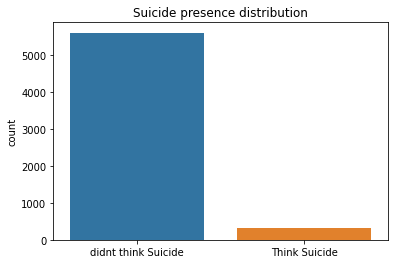

In [25]:
f = sns.countplot(x='mh_suicide', data=df)
f.set_title("Suicide presence distribution")
f.set_xticklabels(['didnt think Suicide', 'Think Suicide'])
plt.xlabel("")

Text(0.5, 0, '')

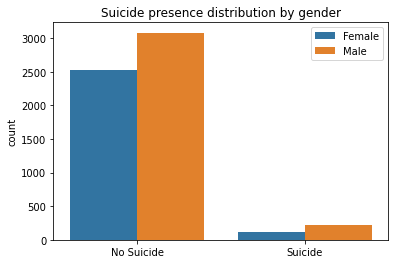

In [26]:
f = sns.countplot(x='mh_suicide', data=df, hue='sex')
plt.legend(['Female', 'Male'])
f.set_title("Suicide presence distribution by gender")
f.set_xticklabels(['No Suicide', 'Suicide'])
plt.xlabel("")

In [27]:
mh_suicide_corr = df.corr()['mh_suicide']

mh_suicide_corr.sort_values(axis=0)

DF2_pr       -0.182007
LF_S2        -0.138665
allownc      -0.098459
edu          -0.091495
incm         -0.082476
                ...   
occp          0.090633
O_chew_d      0.111216
LF_SAFE       0.120603
mh_stress     0.220486
mh_suicide    1.000000
Name: mh_suicide, Length: 86, dtype: float64

Text(0.5, 0, '')

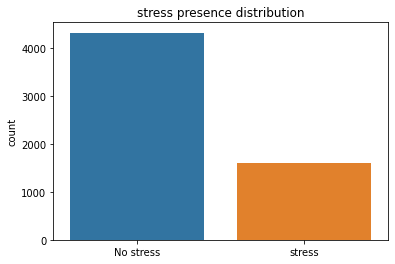

In [28]:
f = sns.countplot(x='mh_stress', data=df)
f.set_title("stress presence distribution")
f.set_xticklabels(['No stress', 'stress'])
plt.xlabel("")

Text(0.5, 0, '')

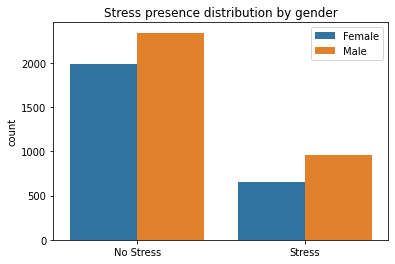

In [29]:
f = sns.countplot(x='mh_stress', data=df, hue='sex')
plt.legend(['Female', 'Male'])
f.set_title("Stress presence distribution by gender")
f.set_xticklabels(['No Stress', 'Stress'])
plt.xlabel("")

## 데이터 전처리

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [31]:
def pipeline(df, nums, cats):
    
    num_inputer = SimpleImputer(strategy='median')
    num_pipeline=Pipeline([
        ("select_numeric",DataFrameSelector(nums)),
        ("impute", num_inputer),
        ("scaler", StandardScaler())])

    cat_imputer = SimpleImputer(strategy='most_frequent')
    cat_pipeline = Pipeline([
        ("select_cat",DataFrameSelector(cats)),
        ("impute", cat_imputer)])
        #("encoder", OneHotEncoder())])
    
    preprocess_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)])
    
    X=preprocess_pipeline.fit_transform(df)
    
    return X

In [32]:
nums = ['incm', 'edu', 'occp', 'marri_1', 'HE_wt', 'HE_wc', 'HE_BMI', 'N_EN', 'N_WATER', 'N_PROT', 'N_FAT', 'N_SFA', 'N_MUFA', 'N_PUFA', 'N_CHOL', 'N_CHO', 'N_TDF', 'N_CA', 'N_FE', 'N_NA', 'N_K', 'N_VITC', 'LF_SAFE', 'LF_S2']
cats = ['apt_t', 'sex', 'cfam', 'allownc', 'house', 'live_t', 'marri_2', 'tins', 'npins', 'DI2_pr', 'DI3_pr', 'DI4_pr', 'DI5_pr', 'DI6_pr', 'DM1_pr', 'DM2_pr', 'DM3_pr', 'DM4_pr', 'D_8_2', 'D_8_4', 'DJ4_pr', 'DE1_pr', 'DE2_pr', 'DC1_pr', 'DC2_pr', 'DC3_pr', 'DC4_pr', 'DC5_pr', 'DC6_pr', 'DC7_pr', 'DF2_pr', 'DL1_pr', 'DJ8_pr', 'DH2_pr', 'DH3_pr', 'DN1_pr', 'DK8_pr', 'DK9_pr', 'DK4_pr', 'LQ4_00', 'LQ1_sb', 'LQ_1EQL', 'LQ_2EQL', 'LQ_3EQL', 'LQ_4EQL', 'LQ_5EQL', 'educ', 'EC1_1', 'BO1', 'BO1_1', 'BO2_1', 'BD1_11', 'mh_stress', 'BE8_1', 'HE_HP', 'HE_anem', 'O_chew_d', 'L_BR_FQ', 'L_LN_FQ', 'L_DN_FQ']

In [33]:
X_data = pipeline(df2,nums,cats)

# 범주형 속성을 원-핫 인코딩을 실행하면서 희소행렬 형태로 output이 출력됩니다.

In [34]:
y_label = df2['mh_suicide']

#### 데이터 나누기

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.3, random_state=0)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [37]:
print('Train data shape: {0}'.format(X_train.shape))
print('Test data shape: {0}'.format(X_test.shape))

print('Train data label => %s' %Counter(y_train))
print('Test data label => %s' %Counter(y_test))

Train data shape: (4154, 84)
Test data shape: (1781, 84)
Train data label => Counter({0.0: 3926, 1.0: 228})
Test data label => Counter({0.0: 1685, 1.0: 96})


In [38]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

In [39]:
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 전 레이블 값 분포: \n', pd.Series(y_train).value_counts())
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (4154, 84) (4154,)
SMOTE 적용 전 레이블 값 분포: 
 0.0    3926
1.0     228
dtype: int64
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (7852, 84) (7852,)
SMOTE 적용 후 레이블 값 분포: 
 0.0    3926
1.0    3926
dtype: int64


In [40]:
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout
from tensorflow.keras import models
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [41]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

model = models.Sequential()
model.add(Dense(32, input_dim = 84, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
history = model.fit(X_train_over,y_train_over,epochs=100,batch_size=512,validation_data=(X_test, y_test))

Epoch 1/100
16/16 [==============================] - 1s 15ms/step - loss: 1.3672 - accuracy: 0.5120 - val_loss: 0.4886 - val_accuracy: 0.8024
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7613 - accuracy: 0.5627 - val_loss: 0.5621 - val_accuracy: 0.7423
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6855 - accuracy: 0.6048 - val_loss: 0.4652 - val_accuracy: 0.8220
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6670 - accuracy: 0.6219 - val_loss: 0.4115 - val_accuracy: 0.8624
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6248 - accuracy: 0.6538 - val_loss: 1.1539 - val_accuracy: 0.1875
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6241 - accuracy: 0.6489 - val_loss: 0.7475 - val_accuracy: 0.5216
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6274 - accuracy: 0.6519 - val_loss: 0.7376 - val_accuracy: 0.5446
Epoch 8/100


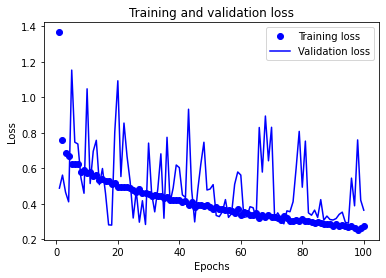

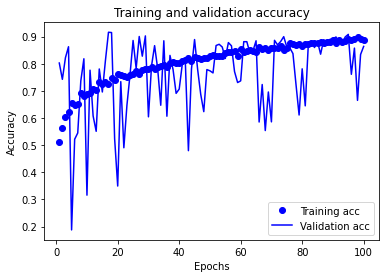

In [43]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [44]:
# 노드수 줄인 모델
smaller = models.Sequential()
smaller.add(Dense(8, input_dim = 84, activation='relu'))
smaller.add(Dense(8, activation='relu'))
smaller.add(Dense(1, activation='sigmoid'))

smaller.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [45]:
smaller_hist = smaller.fit(X_train_over,y_train_over,epochs=100,batch_size=512,validation_data=(X_test, y_test))

Epoch 1/100
16/16 [==============================] - 1s 13ms/step - loss: 0.9614 - accuracy: 0.5229 - val_loss: 0.8702 - val_accuracy: 0.5783
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7687 - accuracy: 0.5204 - val_loss: 0.7955 - val_accuracy: 0.5255
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7153 - accuracy: 0.5470 - val_loss: 0.7420 - val_accuracy: 0.4997
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6808 - accuracy: 0.5722 - val_loss: 0.6558 - val_accuracy: 0.5862
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6601 - accuracy: 0.5913 - val_loss: 0.6426 - val_accuracy: 0.6182
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6499 - accuracy: 0.6056 - val_loss: 0.6533 - val_accuracy: 0.6238
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6433 - accuracy: 0.6136 - val_loss: 0.6512 - val_accuracy: 0.6002
Epoch 8/100


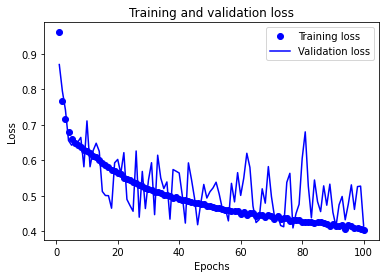

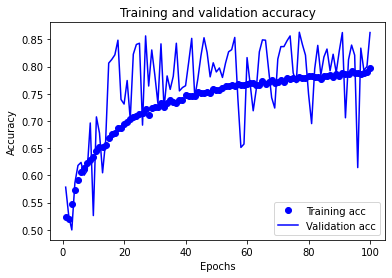

In [46]:
loss = smaller_hist.history['loss']
val_loss = smaller_hist.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

acc = smaller_hist.history['accuracy']
val_acc = smaller_hist.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

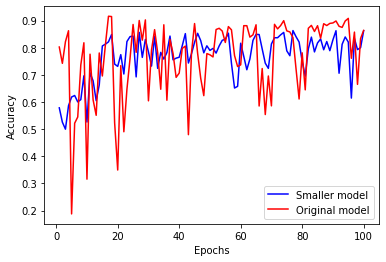

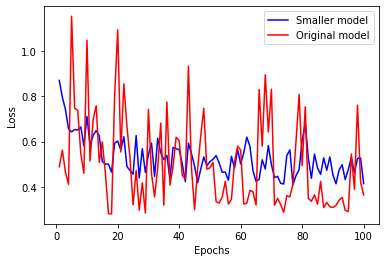

In [47]:
hist_dict = history.history
smaller_dict = smaller_hist.history

val_acc = hist_dict['val_accuracy']
val_loss = hist_dict['val_loss']
smaller_val_acc = smaller_dict['val_accuracy']
smaller_val_loss = smaller_dict['val_loss']

epochs = range(1, len(val_acc)+1)

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, smaller_val_acc, 'b', label='Smaller model')
plt.plot(epochs, val_acc, 'r', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, smaller_val_loss, 'b', label='Smaller model')
plt.plot(epochs, val_loss, 'r', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
# 노드수 키운 모델
bigger = models.Sequential()
bigger.add(Dense(128, input_dim = 84, activation='relu'))
bigger.add(Dense(128, activation='relu'))
bigger.add(Dense(1, activation='sigmoid'))

bigger.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [49]:
bigger_hist = bigger.fit(X_train_over,y_train_over,epochs=100,batch_size=512,validation_data=(X_test, y_test))

Epoch 1/100
16/16 [==============================] - 1s 16ms/step - loss: 1.2326 - accuracy: 0.5427 - val_loss: 0.9972 - val_accuracy: 0.3071
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 0.7592 - accuracy: 0.5869 - val_loss: 0.9098 - val_accuracy: 0.3279
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 0.7057 - accuracy: 0.6011 - val_loss: 1.0875 - val_accuracy: 0.2296
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6641 - accuracy: 0.6246 - val_loss: 0.9722 - val_accuracy: 0.2981
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6491 - accuracy: 0.6314 - val_loss: 1.1081 - val_accuracy: 0.2369
Epoch 6/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6125 - accuracy: 0.6591 - val_loss: 1.0656 - val_accuracy: 0.2880
Epoch 7/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6376 - accuracy: 0.6423 - val_loss: 0.7532 - val_accuracy: 0.5087
Epoch 8/100


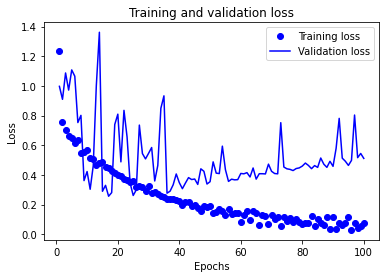

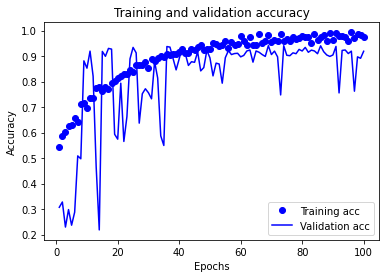

In [50]:
loss = bigger_hist.history['loss']
val_loss = bigger_hist.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

acc = bigger_hist.history['accuracy']
val_acc = bigger_hist.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

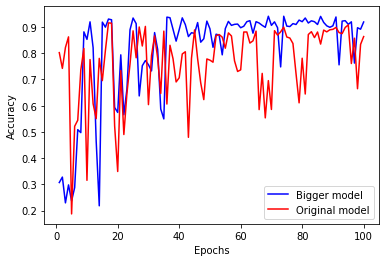

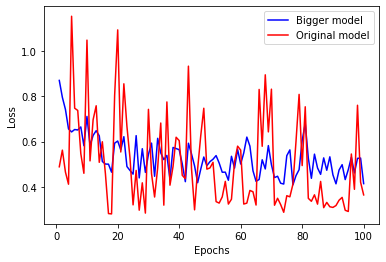

In [51]:
hist_dict = history.history
bigger_dict = bigger_hist.history

val_acc = hist_dict['val_accuracy']
val_loss = hist_dict['val_loss']
bigger_val_acc = bigger_dict['val_accuracy']
bigger_val_loss = bigger_dict['val_loss']

epochs = range(1, len(val_acc)+1)

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, bigger_val_acc, 'b', label='Bigger model')
plt.plot(epochs, val_acc, 'r', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, smaller_val_loss, 'b', label='Bigger model')
plt.plot(epochs, val_loss, 'r', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [52]:
model1 = models.Sequential()
model1.add(Dense(32, input_dim = 84, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
history1 = model1.fit(X_train_over,y_train_over,epochs=100,batch_size=512,validation_data=(X_test, y_test))

Epoch 1/100
16/16 [==============================] - 1s 14ms/step - loss: 0.7587 - accuracy: 0.5652 - val_loss: 0.6406 - val_accuracy: 0.7069
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6452 - accuracy: 0.6139 - val_loss: 0.6668 - val_accuracy: 0.6502
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6293 - accuracy: 0.6416 - val_loss: 0.5303 - val_accuracy: 0.8304
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6226 - accuracy: 0.6368 - val_loss: 0.5272 - val_accuracy: 0.8231
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6015 - accuracy: 0.6640 - val_loss: 0.8769 - val_accuracy: 0.3790
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.5899 - accuracy: 0.6812 - val_loss: 0.7059 - val_accuracy: 0.5424
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5949 - accuracy: 0.6680 - val_loss: 0.6741 - val_accuracy: 0.6103
Epoch 8/100


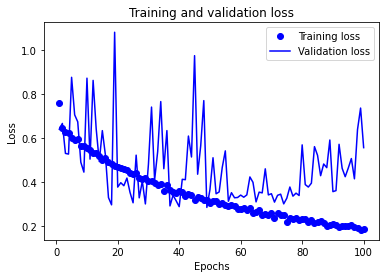

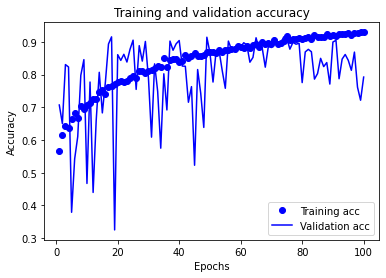

In [54]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

나보다 10번을 지켜보다 (patience = 10) 
별로면 전거로 돌아가야하기때문에 매회마다 저장해야함

In [55]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

MODEL_DIR = './model/' #모델 저장해놓을 디렉토리
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
mc = ModelCheckpoint(filepath=modelpath, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [56]:
final_model_hist = model.fit(X_train_over,y_train_over,
                                   epochs=100,batch_size=512,validation_data=(X_test, y_test),
                                   callbacks=[es,mc])

Epoch 1/100
 1/16 [>.............................] - ETA: 0s - loss: 0.2332 - accuracy: 0.9180
Epoch 1: val_loss improved from inf to 0.39038, saving model to ./model/01-0.3904.hdf5
16/16 [==============================] - 0s 7ms/step - loss: 0.2560 - accuracy: 0.8970 - val_loss: 0.3904 - val_accuracy: 0.8557
Epoch 2/100
 1/16 [>.............................] - ETA: 0s - loss: 0.1952 - accuracy: 0.9375
Epoch 2: val_loss improved from 0.39038 to 0.34884, saving model to ./model/02-0.3488.hdf5
16/16 [==============================] - 0s 6ms/step - loss: 0.2515 - accuracy: 0.8974 - val_loss: 0.3488 - val_accuracy: 0.8776
Epoch 3/100
 1/16 [>.............................] - ETA: 0s - loss: 0.2696 - accuracy: 0.8945
Epoch 3: val_loss improved from 0.34884 to 0.34501, saving model to ./model/03-0.3450.hdf5
16/16 [==============================] - 0s 5ms/step - loss: 0.2596 - accuracy: 0.8935 - val_loss: 0.3450 - val_accuracy: 0.8787
Epoch 4/100
 1/16 [>.............................] - ETA: 0

100 번 명령했지만 14번만에 끝남.

폴더 model 칸에 매회마다 생김.

In [64]:
model.save('/content/model/04-0.3337.hdf5')

이렇게 모델한번 저장해놓으면 이어가며 진행이 가능함..

In [58]:
new_model=tf.keras.models.load_model('/content/model/04-0.3337.hdf5')

그리고 load 를 이용해 불러오기만 하면 됐음

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

1과0 얼마나 잘맞추는지 보고싶으면 confusion matrix 하면 됨

In [60]:
predictions = new_model.predict(X_test)
bi_predictions = tf.round(predictions).numpy().flatten()

(정답값,예측값) 이용해 점수 내줌
recall 값 진짜 1인 사람중 1이라고 한게 38% 나온다.
왜냐면 1 인 사람을 찾는 능력이 떨어지기 때문에.


인공지능기술을 이용해 모델튜닝에 사용할 수 있음.


In [61]:
print(classification_report(y_test, bi_predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93      1685
         1.0       0.17      0.38      0.24        96

    accuracy                           0.87      1781
   macro avg       0.57      0.64      0.58      1781
weighted avg       0.92      0.87      0.89      1781



In [62]:
import matplotlib as mpl
from sklearn import metrics

튜닝시 1을 더 맞출수 있는 쪽으로 끌어올려야함.

acuracy 는 1에 가까우나, auc 0.6 에다가 설명가능인공지능 말하려면 건강한사람에게는 적합하나
1인 사람에게는 좀 어렵다. => 인공지능에 대한 신뢰성.

모델튜닝할때는 auc 를 0.7 이상은 되도록 튜닝해야함.

0.6361646884272997


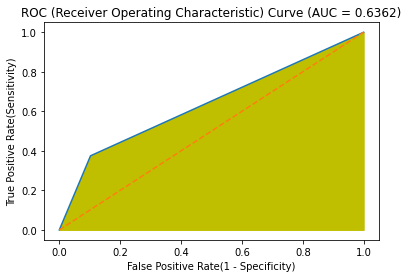

In [65]:
# ROC 그리기
fpr, tpr, thresholds = metrics.roc_curve(y_test, bi_predictions) #곡선 그리기

plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, color='y')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

score = metrics.auc(fpr, tpr) #면적 구하기
print(score) #1.0

plt.title('ROC (Receiver Operating Characteristic) Curve (AUC = {})'.format(round(score,4)))
plt.show()